In [1]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import time
img = cv2.imread('/home/harish/Documents/Python Scripts/IVP Lab/Assignment2/Lenna_color.png')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
(x,y,z) = img.shape

(512, 512, 3)


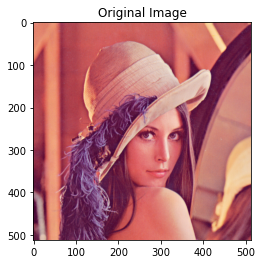

In [2]:
plt.imshow(img)
plt.title("Original Image")
print(img.shape)

In [3]:
def rgb2yuv(R,G,B):
     Y = (( 66 * R + 129 * G +  25 * B + 128) >> 8) +  16
     U = ((-38 * R -  74 * G + 112 * B + 128) >> 8) + 128
     V = ((112 * R -  94 * G -  18 * B + 128) >> 8) + 128
     return [Y,U,V]

In [4]:
# Part a
def RGB2YUV(img):
    img_out = np.array([[rgb2yuv(img[i,j,0],img[i,j,1],img[i,j,2])for j in range(y)] for i in range(x)]).astype(np.uint8)
    return img_out

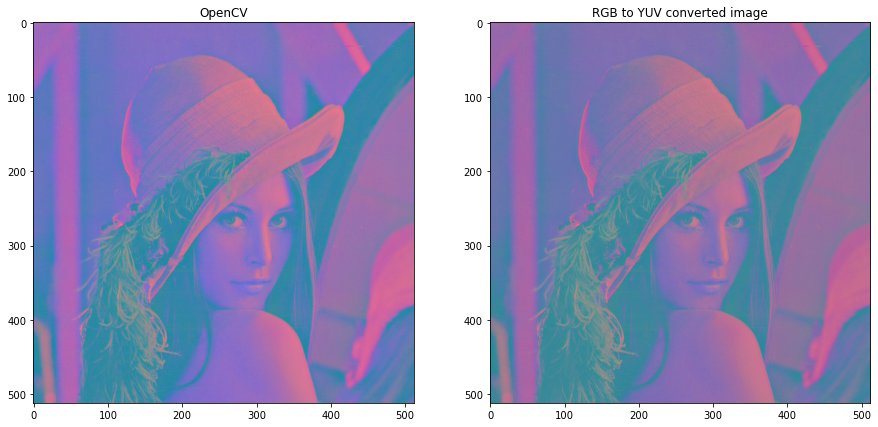

In [5]:
img_out = RGB2YUV(img)
img_cv = cv2.cvtColor(img,cv2.COLOR_RGB2YUV)
plt.figure(figsize=(5*3, 5*3), constrained_layout=False)
plt.subplot(1,2,1)
plt.imshow(img_cv)
plt.title('OpenCV')
plt.subplot(1,2,2)
plt.imshow(img_out)
plt.title('RGB to YUV converted image')
plt.show()

In [6]:
# Part b
def yuv2rgb(Y,U,V):
    R = (298*(Y-16)+409*(V-128)+128)>>8
    G = (298*(Y-16)-100*(U-128)-208*(V-128)+128)>>8
    B = (298*(Y-16)+516*(U-128)+128)>>8
    return [R,G,B]
    
def YUV2RGB(img):
    img_out = np.array([[yuv2rgb(img[i,j,0],img[i,j,1],img[i,j,2])for j in range(y)] for i in range(x)]).astype(np.uint8)
    return img_out

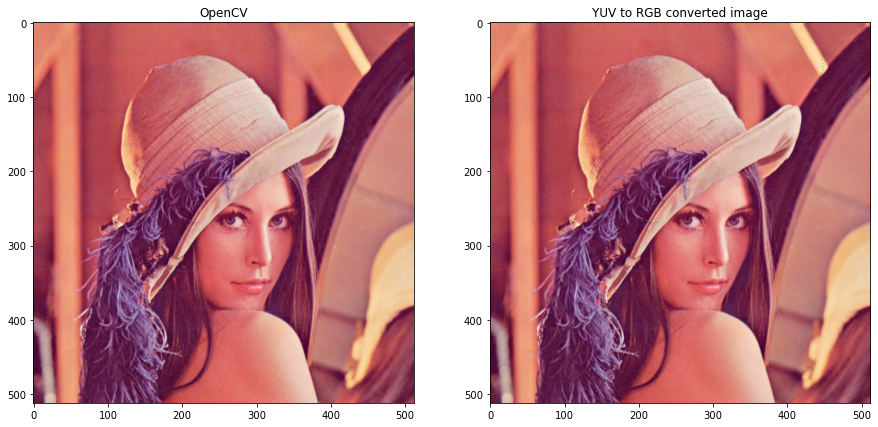

In [7]:
img_out2 = YUV2RGB(img_out)
img_cv2 = cv2.cvtColor(img_cv,cv2.COLOR_YUV2RGB)
plt.figure(figsize=(5*3, 5*3), constrained_layout=False)
plt.subplot(1,2,1)
plt.imshow(img_cv2)
plt.title('OpenCV')
plt.subplot(1,2,2)
plt.imshow(img_out2)
plt.title('YUV to RGB converted image')
plt.show()